In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
cd/content/drive/My Drive/Python Collabs/Deep Neural Network Checkpoint

/content/drive/My Drive/Python Collabs/Deep Neural Network Checkpoint


**Importing Libraries**

In [64]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#Understanding the dataset


* **age**	: numeric :	age of a person
* **job**	: Categorical,nominal	: type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* **marital** :	categorical,nominal	: marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* **education** :	categorical,nominal	: ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* **default**	: categorical,nominal: has credit in default? ('no','yes','unknown')
* **housing**	:categorical,nominal :	has housing loan? ('no','yes','unknown')
* **loan**	: categorical,nominal	: has personal loan? ('no','yes','unknown')
* **contact**	: categorical,nominal : contact communication type ('cellular','telephone')
* **month**	: categorical,ordinal :	last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
* **day_of_week**	: categorical,ordinal	: last contact day of the week ('mon','tue','wed','thu','fri')
* **duration** :	numeric	: last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')
* **campaign**	: numeric	: number of contacts performed during this campaign and for this client (includes last contact)
* **pdays**	: numeric	: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
* **previous** :	numeric :	number of contacts performed before this campaign and for this client
* **poutcome**	: categorical,nominal	: outcome of the previous marketing campaign ('failure','nonexistent','success')

**Target variable (desired output):**
* y	: binary :	has the client subscribed a term deposit? ('yes','no')

In [65]:
df=pd.read_csv("bank.csv",sep=",")

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [67]:
print('Shape of the data is: ',df.shape)

Shape of the data is:  (11162, 17)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [69]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


#SOME DATA VISUALIZATION

**Data Distribution**

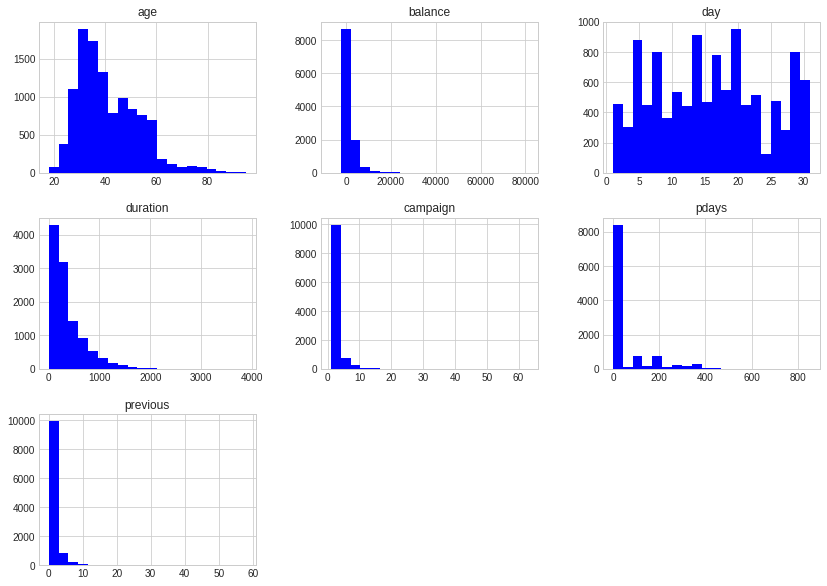

In [70]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='b')
plt.show()

**Data Boxplots**

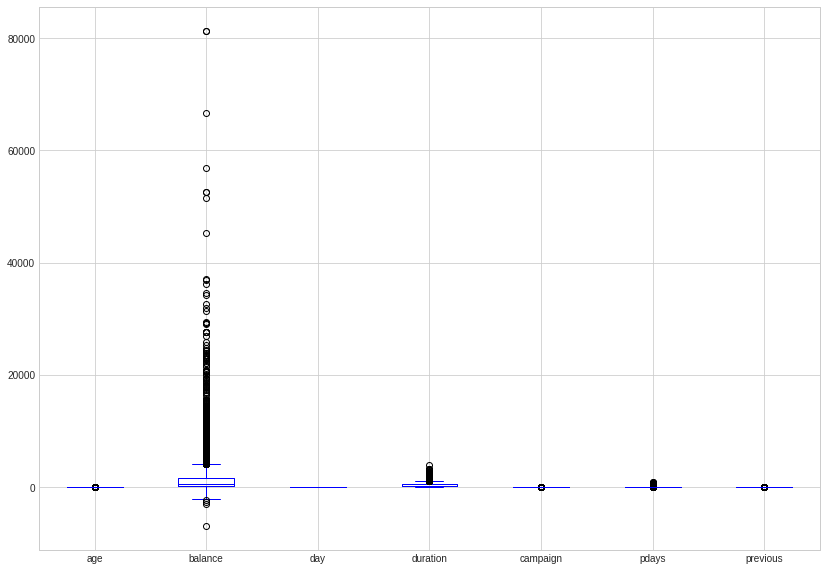

In [71]:
df.boxplot( figsize=(14,10), color='b')
plt.show()

**Graphical Analysis**

In [72]:
data1 = df[df['deposit'] == 'yes']
data2 = df[df['deposit'] == 'no']

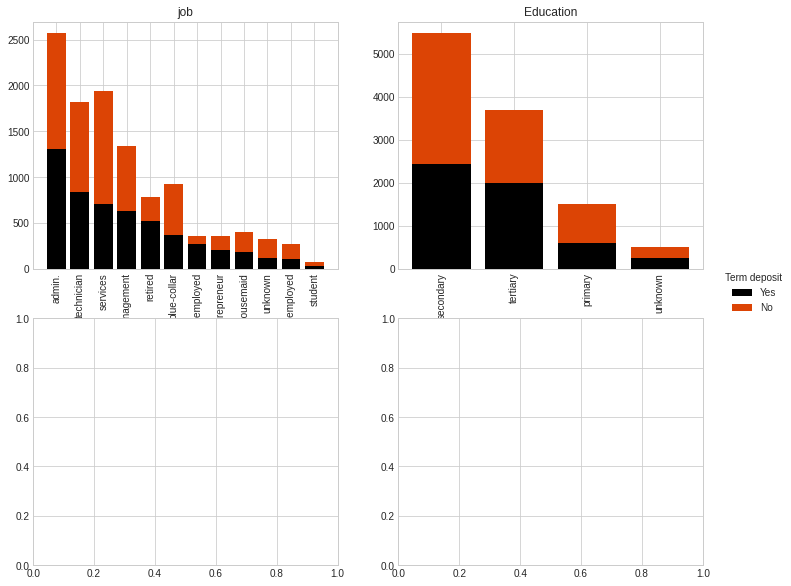

In [73]:
fig,ax = plt.subplots(2, 2, figsize=(12,10))

b1 = ax[0, 0].bar(data1['job'].unique(),height = data1['job'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['job'].unique(),height = data2['job'].value_counts()[data1['job'].value_counts().index],bottom = data1['job'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('job')
ax[0, 0].tick_params(axis='x',rotation=90)

ax[0, 1].bar(data1['education'].unique(),height = data1['education'].value_counts(),color='#000000') #row=0, col=1
ax[0, 1].bar(data1['education'].unique(),height = data2['education'].value_counts()[data1['education'].value_counts().index],bottom = data1['education'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Education')
ax[0, 1].tick_params(axis='x',rotation=90)
#ax[0, 1].xticks(rotation=90)
plt.figlegend(('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

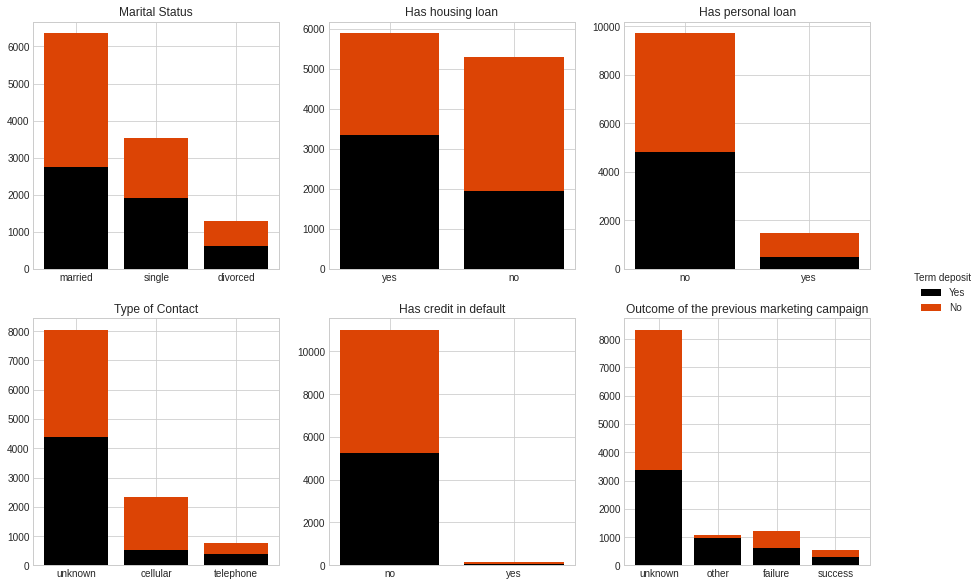

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))
b1 = ax[0, 0].bar(data1['marital'].unique(),height = data1['marital'].value_counts(),color='#000000')
b2 = ax[0, 0].bar(data1['marital'].unique(),height = data2['marital'].value_counts()[data1['marital'].value_counts().index],bottom = data1['marital'].value_counts(),color = '#DC4405') 
ax[0, 0].title.set_text('Marital Status')
#ax[0, 0].legend((b1[0], b2[0]), ('Yes', 'No'))
ax[0, 1].bar(data1['housing'].unique(),height = data1['housing'].value_counts(),color='#000000')
ax[0, 1].bar(data1['housing'].unique(),height = data2['housing'].value_counts()[data1['housing'].value_counts().index],bottom = data1['housing'].value_counts(),color = '#DC4405') 
ax[0, 1].title.set_text('Has housing loan')
ax[0, 2].bar(data1['loan'].unique(),height = data1['loan'].value_counts(),color='#000000')
ax[0, 2].bar(data1['loan'].unique(),height = data2['loan'].value_counts()[data1['loan'].value_counts().index],bottom = data1['loan'].value_counts(),color = '#DC4405') 
ax[0, 2].title.set_text('Has personal loan')
ax[1, 0].bar(data1['contact'].unique(),height = data1['contact'].value_counts(),color='#000000')
ax[1, 0].bar(data1['contact'].unique(),height = data2['contact'].value_counts()[data1['contact'].value_counts().index],bottom = data1['contact'].value_counts(),color = '#DC4405') 
ax[1, 0].title.set_text('Type of Contact')
ax[1, 1].bar(data1['default'].unique(),height = data1['default'].value_counts(),color='#000000')
ax[1, 1].bar(data1['default'].unique(),height = data2['default'].value_counts()[data1['default'].value_counts().index],bottom = data1['default'].value_counts(),color = '#DC4405') 
ax[1, 1].title.set_text('Has credit in default')
ax[1, 2].bar(data1['poutcome'].unique(),height = data1['poutcome'].value_counts(),color='#000000')
ax[1, 2].bar(data1['poutcome'].unique(),height = data2['poutcome'].value_counts()[data1['poutcome'].value_counts().index],bottom = data1['poutcome'].value_counts(),color = '#DC4405') 
ax[1, 2].title.set_text('Outcome of the previous marketing campaign')
plt.figlegend((b1[0], b2[0]), ('Yes', 'No'),loc="right",title = "Term deposit")
plt.show()

**Counting the target**

In [75]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

#Data Preprocessing , Cleaning and Transformation




**Trearing Outliers**

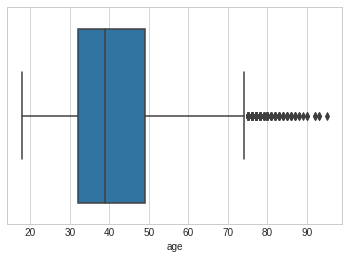

In [76]:
sns.boxplot(x=df.age)

In [77]:
ot=df.describe()   #This function is to detect the max and min of quartiles
c='age'
max=(ot.loc['75%',c])+(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
min=(ot.loc['25%',c])-(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
print(max,min)

def outlier_replacer_funct(df,c,max,min):   # Replacing the outliers with np.nan
  for i in range(0,len(df[c])):
    if df[c][i]<min or df[c][i]>max:
       df[c][i]=np.nan

74.5 6.5


In [78]:
df1=df.copy()
outlier_replacer_funct(df1,c,max,min)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [79]:
df1.age= df1.age.fillna(df.age.mean())

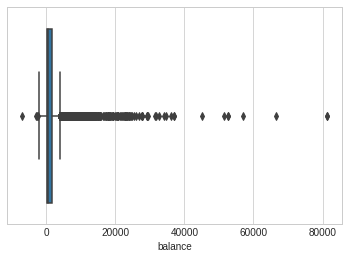

In [80]:
sns.boxplot(x=df.balance)

In [81]:
ot=df.describe()
c='balance'
max=(ot.loc['75%',c])+(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
min=(ot.loc['25%',c])-(1.5*((ot.loc['75%',c])-(ot.loc['25%',c])))
print(max,min)

def outlier_replacer_funct(df,c,max,min):
  for i in range(0,len(df[c])):
    if df[c][i]<min or df[c][i]>max:
       df[c][i]=np.nan

4087.0 -2257.0


In [82]:
df2=df1.copy()
outlier_replacer_funct(df2,c,max,min)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
df2.balance= df2.balance.fillna(df1.balance.mean())

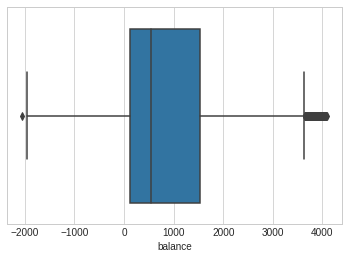

In [84]:
sns.boxplot(x=df2.balance)

In [85]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [86]:
df2['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [87]:
'''df2['job']=df2['job'].map({'admin.':0,'technician':1,'services':2,'retired':3,'blue-collar':4,'unemployed':5,'entrepreneur':6,'housemaid':7,'unknown':8,'self-employed':9,'student':10})
df2['marital']=df2['marital'].map({'married':0,'single':1,'divorced':3})
df2['education']=df2['education'].map({'secondary':0,'tertiary':1,'primary':2,'unknown':3})
df2['default']=df2['default'].map({'no':0,'yes':1})
df2['housing']=df2['housing'].map({'no':0,'yes':1})
df2['loan']=df2['loan'].map({'no':0,'yes':1})
df2['contact']=df2['contact'].map({'unknown':0,'cellular':1,'cellular':2})
df2['month']=df2['month'].map({'jan.':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
df2['poutcome']=df2['poutcome'].map({'unknown':0,'other':1,'failure':2,'success':3})
df2['deposit']=df2['deposit'].map({'no':0,'yes':1}) '''

"df2['job']=df2['job'].map({'admin.':0,'technician':1,'services':2,'retired':3,'blue-collar':4,'unemployed':5,'entrepreneur':6,'housemaid':7,'unknown':8,'self-employed':9,'student':10})\ndf2['marital']=df2['marital'].map({'married':0,'single':1,'divorced':3})\ndf2['education']=df2['education'].map({'secondary':0,'tertiary':1,'primary':2,'unknown':3})\ndf2['default']=df2['default'].map({'no':0,'yes':1})\ndf2['housing']=df2['housing'].map({'no':0,'yes':1})\ndf2['loan']=df2['loan'].map({'no':0,'yes':1})\ndf2['contact']=df2['contact'].map({'unknown':0,'cellular':1,'cellular':2})\ndf2['month']=df2['month'].map({'jan.':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})\ndf2['poutcome']=df2['poutcome'].map({'unknown':0,'other':1,'failure':2,'success':3})\ndf2['deposit']=df2['deposit'].map({'no':0,'yes':1}) "

In [88]:
from sklearn.preprocessing import LabelEncoder 
encoder=LabelEncoder()
df2['job']=encoder.fit_transform(df2['job'])
df2['marital']=encoder.fit_transform(df2['marital'])
df2['education']=encoder.fit_transform(df2['education'])
df2['default']=encoder.fit_transform(df2['default'])
df2['housing']=encoder.fit_transform(df2['housing'])
df2['loan']=encoder.fit_transform(df2['loan'])
df2['contact']=encoder.fit_transform(df2['contact'])
df2['month']=encoder.fit_transform(df2['month'])
df2['poutcome']=encoder.fit_transform(df2['poutcome'])

In [89]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343.0,1,0,2,5,8,1042,1,-1,0,3,yes
1,56.0,0,1,1,0,45.0,0,0,2,5,8,1467,1,-1,0,3,yes
2,41.0,9,1,1,0,1270.0,1,0,2,5,8,1389,1,-1,0,3,yes
3,55.0,7,1,1,0,2476.0,1,0,2,5,8,579,1,-1,0,3,yes
4,54.0,0,1,2,0,184.0,0,0,2,5,8,673,2,-1,0,3,yes


**Data Normalization**

In [90]:
numerical_values = df2[['age','balance', 'duration']]

In [91]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
columns_names=numerical_values.columns
d=scaler.fit_transform(numerical_values)
scaled_df=pd.DataFrame(d,columns=columns_names)
scaled_df.head()

,age,balance,duration
0,0.732143,0.715776,0.268110
1,0.678571,0.341265,0.377675
2,0.410714,0.540906,0.357566
3,0.660714,0.737451,0.148750
4,0.642857,0.363918,0.172983


In [92]:
df2['age']=scaled_df.age
df2['balance']=scaled_df.balance
df2['duration']=scaled_df.duration

In [108]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.732143,0,1,1,0,0.715776,1,0,2,5,8,0.268110,1,-1,0,3,yes
1,0.678571,0,1,1,0,0.341265,0,0,2,5,8,0.377675,1,-1,0,3,yes
2,0.410714,9,1,1,0,0.540906,1,0,2,5,8,0.357566,1,-1,0,3,yes
3,0.660714,7,1,1,0,0.737451,1,0,2,5,8,0.148750,1,-1,0,3,yes
4,0.642857,0,1,2,0,0.363918,0,0,2,5,8,0.172983,2,-1,0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.267857,1,2,0,0,0.334094,1,0,0,20,0,0.065739,1,-1,0,3,no
11158,0.375000,7,1,1,0,0.453390,0,0,2,16,6,0.020882,4,-1,0,3,no
11159,0.250000,9,2,1,0,0.338657,0,0,0,19,1,0.039701,2,-1,0,3,no
11160,0.446429,9,1,1,0,0.333931,0,1,0,8,8,0.001805,2,172,5,0,no


#Another Visualisation and looking for correlations

In [ ]:
sns.pairplot(df2)

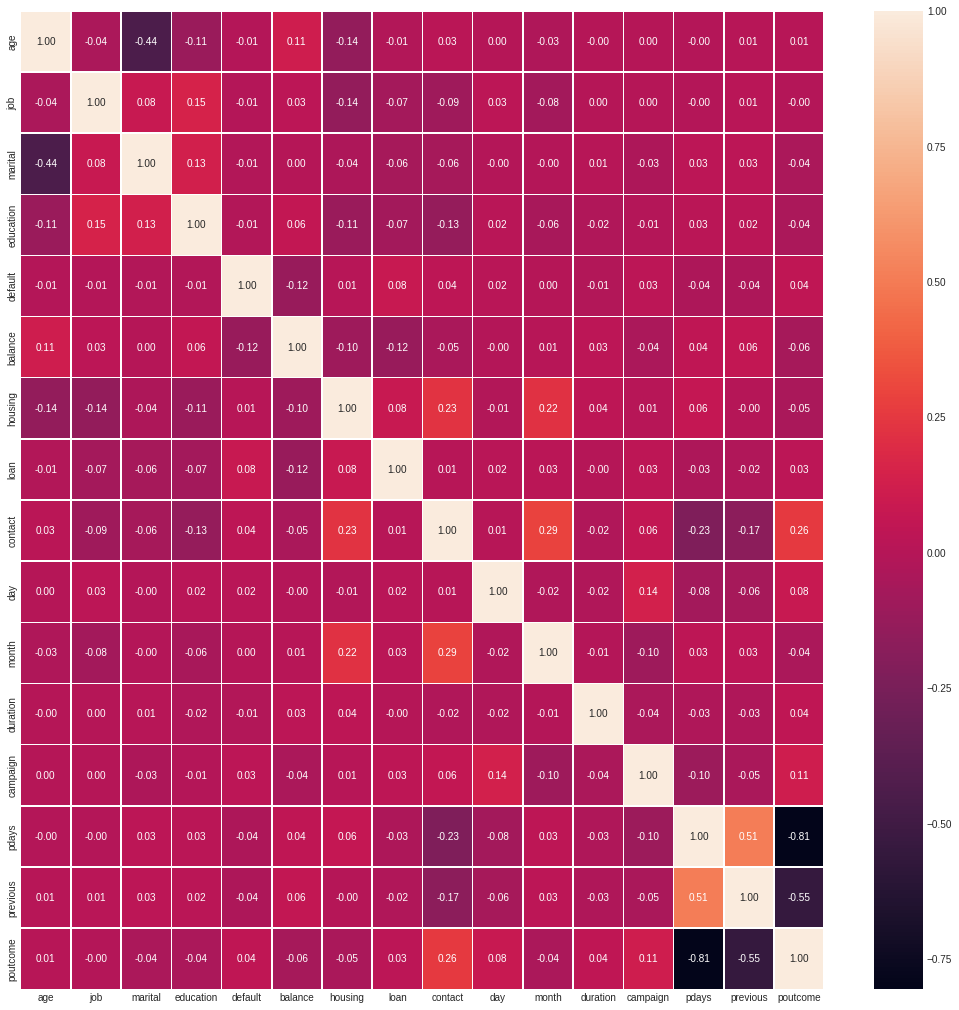

In [94]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt='.2f',ax=ax)

#Implementing a deep learning Model

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [96]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [97]:
# features
X = df2[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]  

In [98]:
X=np.array(X)

In [99]:
X.shape

(11162, 16)

In [109]:
# target
Y = df2.deposit

In [112]:
from tensorflow.keras.utils import to_categorical
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = to_categorical(encoded_Y)

In [102]:
Y=np.array(Y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1)

In [116]:
y_test.shape

(1117, 2)

#TRAIN

In [172]:
batch_size = 64
num_classes = 2
epochs = 20
# Create a sequential model here 

model = keras.Sequential([
    Dense(128, activation='relu',input_shape=(16,)),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax'),
])

# End Code

In [173]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 128)               2176      
                                                                 
 dense_59 (Dense)            (None, 256)               33024     
                                                                 
 dense_60 (Dense)            (None, 2)                 514       
                                                                 
Total params: 35,714
Trainable params: 35,714
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
157/157 [==============================] - 1s 5ms/step - loss: 0.8130 - accuracy: 0.6105 - val_loss: 0.8167 - val_accuracy: 0.6043
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 0.7060 - accuracy: 0.6584 - val_loss: 0.6064 - val_accuracy: 0.6840
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6681 - accuracy: 0.6815 - val_loss: 0.5587 - val_accuracy: 0.7171
Epoch 4/20
157/157 [==============================] - 1s 4ms/step - loss: 0.6354 - accuracy: 0.7134 - val_loss: 0.5908 - val_accuracy: 0.7180
Epoch 5/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5668 - accuracy: 0.7526 - val_loss: 0.5403 - val_accuracy: 0.7502
Epoch 6/20
157/157 [==============================] - 1s 4ms/step - loss: 0.5294 - accuracy: 0.7603 - val_loss: 0.4963 - val_accuracy: 0.7717
Epoch 7/20
157/157 [==============================] - 1s 4ms/step - loss: 0.4762 - accuracy: 0.7833 - val_loss: 0.4973 - val_accuracy: 0.7690
Epoch 

In [151]:
score_test = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_test[1])

Test accuracy: 0.7833482623100281


In [153]:
score_train = model.evaluate(X_train, y_train, verbose=0)
print('Test accuracy:', score_train[1])

Test accuracy: 0.7967147827148438


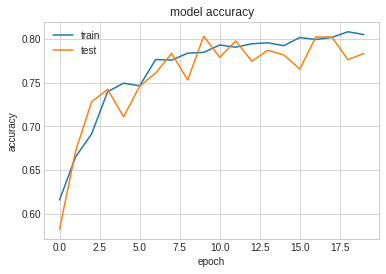

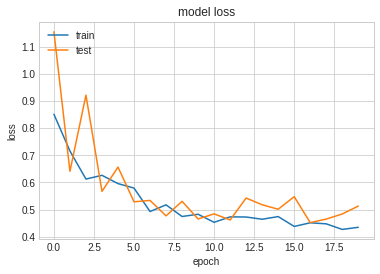

In [154]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Conclusion:**

Using 128 Neurons for the first layer and doubling the number for the second layer with 20 epochs led to an accuracy of 79% in the test data.
The curves show the pattern of learning of model through the iterations
and alternative model accuracy between test and test data

When inverting the layers : layer 1 = 256 neurons and layer 2 :128 neurons
The accuracy hasnt improved shwoing that this kind of architechture doesnt fit
with the nature of the treated data .


In [187]:
batch_size = 16
num_classes = 2
epochs = 20
# Create a sequential model here 

model1 = keras.Sequential([
    Dense(128, activation='relu',input_shape=(16,)),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax'),
])

# End Code

In [188]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training
history1 = model1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test)
                    )

Epoch 1/20
628/628 [==============================] - 3s 3ms/step - loss: 0.8326 - accuracy: 0.6294 - val_loss: 0.6270 - val_accuracy: 0.6634
Epoch 2/20
628/628 [==============================] - 2s 3ms/step - loss: 0.6693 - accuracy: 0.7044 - val_loss: 0.5558 - val_accuracy: 0.7332
Epoch 3/20
628/628 [==============================] - 2s 3ms/step - loss: 0.5271 - accuracy: 0.7476 - val_loss: 0.5705 - val_accuracy: 0.7198
Epoch 4/20
628/628 [==============================] - 2s 3ms/step - loss: 0.4997 - accuracy: 0.7732 - val_loss: 0.4799 - val_accuracy: 0.7726
Epoch 5/20
628/628 [==============================] - 2s 3ms/step - loss: 0.4794 - accuracy: 0.7745 - val_loss: 0.4561 - val_accuracy: 0.7878
Epoch 6/20
628/628 [==============================] - 2s 3ms/step - loss: 0.4622 - accuracy: 0.7837 - val_loss: 0.4834 - val_accuracy: 0.7807
Epoch 7/20
628/628 [==============================] - 2s 3ms/step - loss: 0.4543 - accuracy: 0.7889 - val_loss: 0.4643 - val_accuracy: 0.7816
Epoch 

In [189]:
score_test = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_test[1])

Test accuracy: 0.8057296276092529


In [190]:
score_test = model1.evaluate(X_train, y_train, verbose=0)
print('Test accuracy:', score_test[1])

Test accuracy: 0.8242906928062439


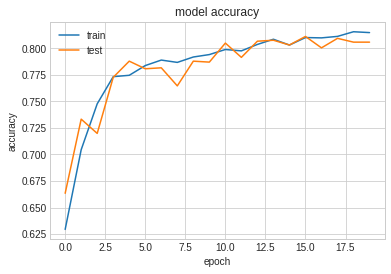

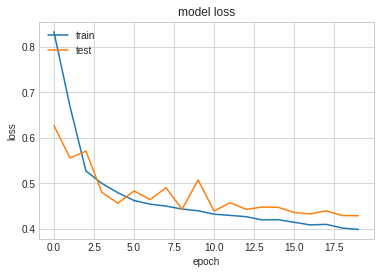

In [191]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Conclusion:

Reducing the batch size with keeping the same architecture led to slight better performances of the model